# **Car Price Prediction Model :**



# Importing Libraries and Dataset :

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [9]:
data = pd.read_csv("car data.csv")

In [10]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [12]:
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [13]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
data['Owner'].unique()

array([0, 1, 3])

# Data Preprocessing :

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [17]:
data.duplicated().sum()

2

In [18]:
data.drop_duplicates(inplace = True)

In [19]:
data.duplicated().sum()

0

In [20]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Encoding :

In [21]:
data.select_dtypes(include = 'object').columns

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [22]:
le = LabelEncoder()

In [23]:
ar = le.fit_transform(data['Fuel_Type'])
data['Fuel_Type'] = pd.DataFrame(ar,columns=['Fuel_Type'])

In [24]:
ar = le.fit_transform(data['Transmission'])
data['Transmission'] = pd.DataFrame(ar,columns=['Transmission'])

In [25]:
ar = le.fit_transform(data['Selling_type'])
data['Selling_type'] = pd.DataFrame(ar,columns=['Selling_type'])

In [26]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2.0,0.0,1.0,0
1,sx4,2013,4.75,9.54,43000,1.0,0.0,1.0,0
2,ciaz,2017,7.25,9.85,6900,2.0,0.0,1.0,0
3,wagon r,2011,2.85,4.15,5200,2.0,0.0,1.0,0
4,swift,2014,4.60,6.87,42450,1.0,0.0,1.0,0


In [27]:
data.iloc[:,1:]

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2.0,0.0,1.0,0
1,2013,4.75,9.54,43000,1.0,0.0,1.0,0
2,2017,7.25,9.85,6900,2.0,0.0,1.0,0
3,2011,2.85,4.15,5200,2.0,0.0,1.0,0
4,2014,4.60,6.87,42450,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,2.0,0.0,1.0,0
297,2015,4.00,5.90,60000,1.0,0.0,1.0,0
298,2009,3.35,11.00,87934,2.0,0.0,1.0,0
299,2017,11.50,12.50,9000,NaN,NaN,NaN,0


In [28]:
data.dropna(inplace = True)

In [29]:
data.iloc[:,1:]

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2.0,0.0,1.0,0
1,2013,4.75,9.54,43000,1.0,0.0,1.0,0
2,2017,7.25,9.85,6900,2.0,0.0,1.0,0
3,2011,2.85,4.15,5200,2.0,0.0,1.0,0
4,2014,4.60,6.87,42450,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
294,2014,3.75,6.80,33019,1.0,0.0,1.0,0
295,2015,8.55,13.09,60076,2.0,0.0,1.0,0
296,2016,9.50,11.60,33988,2.0,0.0,1.0,0
297,2015,4.00,5.90,60000,1.0,0.0,1.0,0


In [30]:
data.iloc[:,1:].corr()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.230052,-0.055141,-0.523482,-0.054672,0.038469,0.183553,-0.181107
Selling_Price,0.230052,1.000000,0.877118,0.032477,-0.349217,-0.503191,-0.101019,-0.087273
Present_Price,-0.055141,0.877118,1.000000,0.206638,-0.286824,-0.478214,-0.142467,0.010185
Driven_kms,-0.523482,0.032477,0.206638,1.000000,-0.064320,-0.124934,-0.132873,0.088651
Fuel_Type,-0.054672,-0.349217,-0.286824,-0.064320,1.000000,0.350092,0.075928,-0.045308
Selling_type,0.038469,-0.503191,-0.478214,-0.124934,0.350092,1.000000,0.060745,0.038376
Transmission,0.183553,-0.101019,-0.142467,-0.132873,0.075928,0.060745,1.000000,-0.051741
Owner,-0.181107,-0.087273,0.010185,0.088651,-0.045308,0.038376,-0.051741,1.000000


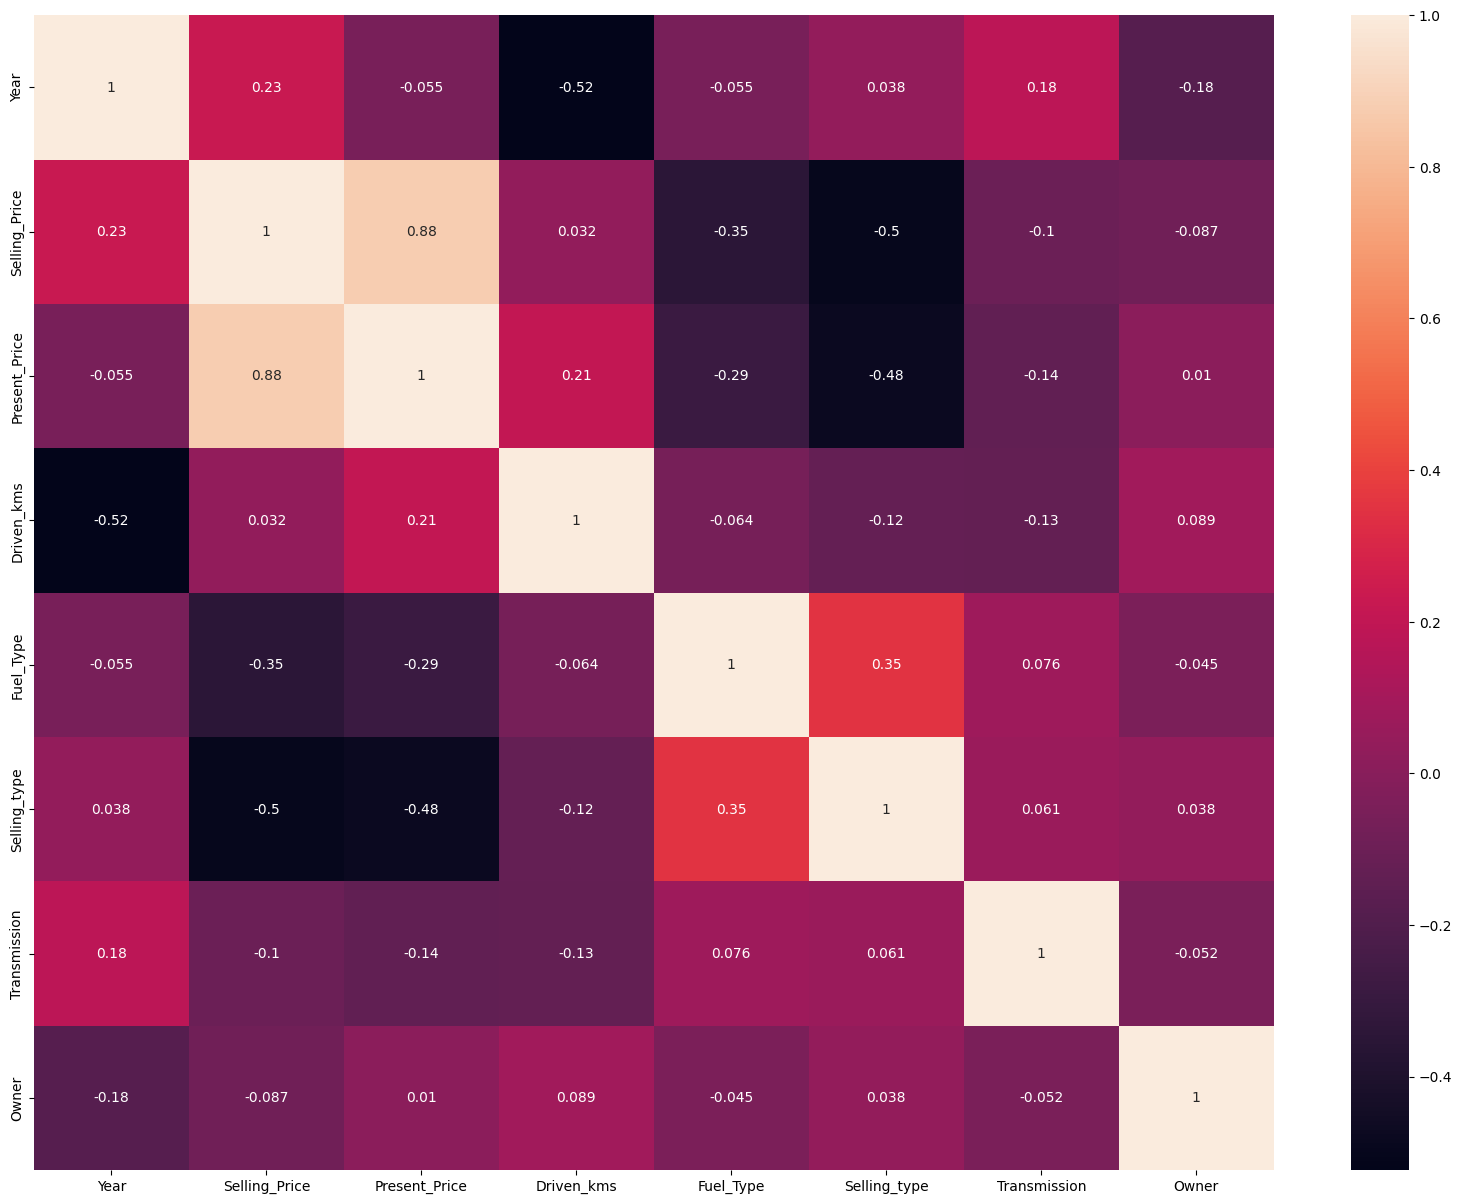

In [31]:
plt.figure(figsize=(20,15))
correlation = data.iloc[:,1:].corr()
sns.heatmap(correlation, annot = True)
plt.show()

# **Model Training & Testing :**

In [32]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [33]:
new_data = data[['Driven_kms','Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]

In [34]:
x = np.array(new_data)
y = np.array(data['Present_Price'])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [36]:
model = DecisionTreeRegressor()

In [39]:
param = {"criterion" : ["squared_error", "friedman_mse", "absolute_error","poisson"],"splitter" : ["best", "random"],"max_depth" : [i for i in range (2,20)]}

In [40]:
rd = RandomizedSearchCV(model,param,n_iter=20)
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [41]:
rd.best_params_

{'splitter': 'random', 'max_depth': 5, 'criterion': 'absolute_error'}

In [42]:
model = DecisionTreeRegressor(splitter = 'random', max_depth = 4, criterion = 'friedman_mse')

In [43]:
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, splitter='random')

## **Predictions :**

In [44]:
predictions = model.predict(x_test)

In [45]:
model.score(x_test,predictions)*100

100.0

**The model gives 100% accuracy on the test set, which is excellent.**

In [46]:
driven_kms = int(input("Enter in Killometers that the car has been driven :"))
fuel_type = int(input("Enter your Fuel type as : \n1. CNG - 0 \n2. Deisel - 1 \n3. Petrol - 2 :\n You Entered :"))
if fuel_type > 2:
  print("Wrong input !!!!")
Selling_type = int(input("Enter your seller type as : \n1. Dealer - 0 \n2. Individual - 1 \n You Entered : "))
if Selling_type > 1:
  print("Wrong input !!!!")
Transmission = int(input("Enter your Transmission type as : \n1. Automatic - 0 \n2. Manual - 1 \n You Entered : "))
if Transmission > 1:
  print("Wrong input !!!!")
Owner = int(input("How many owners do the car had ? : 0,1 or 3 \n You Entered :"))
if Owner > 3 or Owner == 2:
  print("Wrong input !!!!")

#---------------------------------------------------------------------------------------------------------------------------------#

input = [[driven_kms,fuel_type,Selling_type,Transmission,Owner]]
print("The Predicted Price is going to be :",model.predict(input),"in Lakh")



Enter in Killometers that the car has been driven :0
Enter your Fuel type as : 
1. CNG - 0 
2. Deisel - 1 
3. Petrol - 2 :
 You Entered :0
Enter your seller type as : 
1. Dealer - 0 
2. Individual - 1 
 You Entered : 0
Enter your Transmission type as : 
1. Automatic - 0 
2. Manual - 1 
 You Entered : 1
How many owners do the car had ? : 0,1 or 3 
 You Entered :0
The Predicted Price is going to be : [9.71176471] in Lakh
